<a href="https://colab.research.google.com/github/rohankavari/MachineLearning/blob/main/Logistic_Regression_imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , roc_curve , auc
from sklearn import metrics
import seaborn as sns

In [24]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 plt.legend()

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset/framingham.csv")

In [26]:
df.dropna(inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


# Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


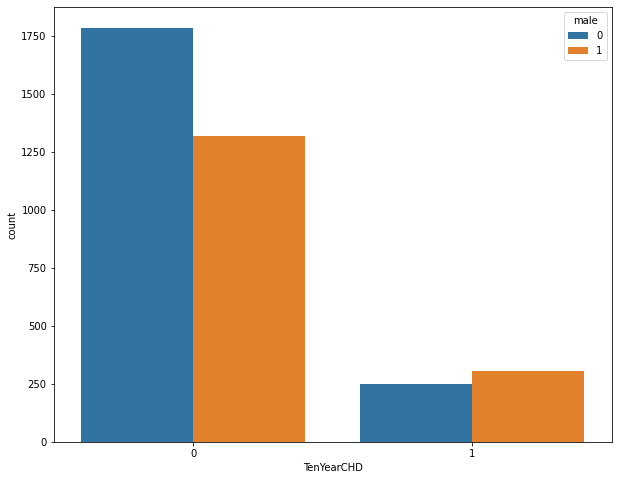

In [31]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.male)
plt.show()

In the sample of people who doesnt have CHD,females are dominant. Whereas in the sample of peple who has CHD, Males are dominant. Thus this variable is useful for prediction

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


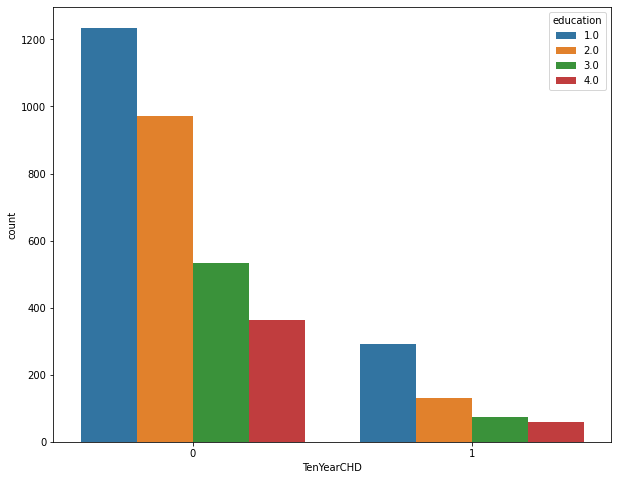

In [32]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.education)
plt.show()

for the people who has CHD and who doesnt, the distribution of edcuation remains the same. Thus this variable is not useful.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


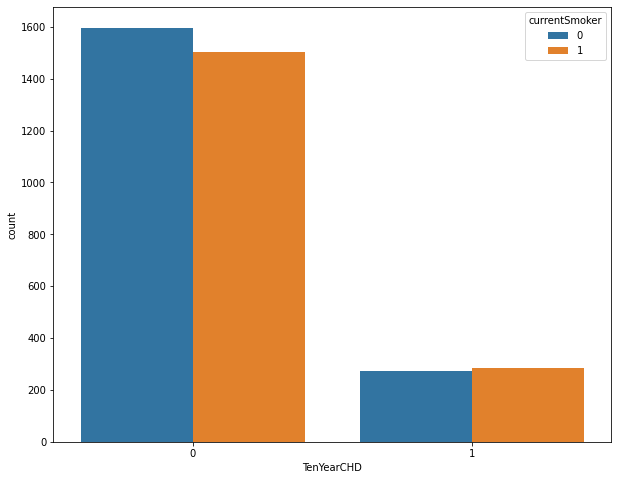

In [33]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.currentSmoker)
plt.show()

in the sample of people who doesnt have CHD,people who doesnt smoke are dominant. Whereas in the sample of peple who has CHD, people who smoke  are dominant. Thus this variable is useful for prediction. (But the diffence is very small.)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


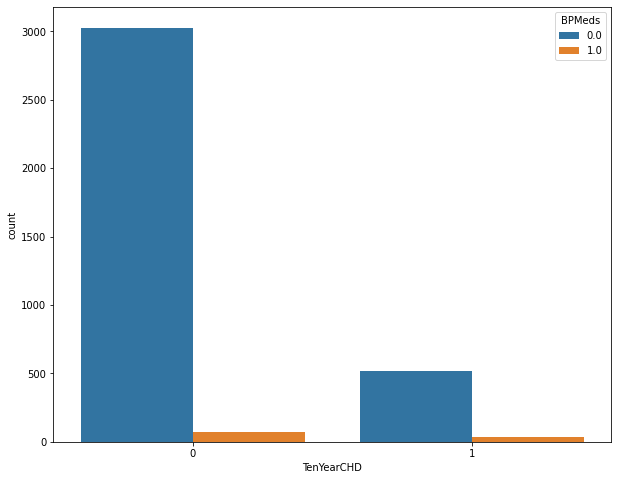

In [34]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.BPMeds)
plt.show()

for the people who has CHD and who doesnt, the distribution of BPMeds remains the same. Thus this variable is not useful.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


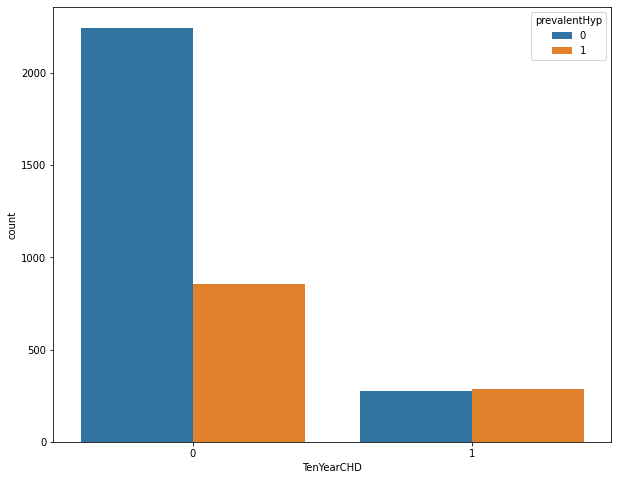

In [35]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.prevalentHyp)
plt.show()

in the sample of people who doesnt have CHD,people who didnt have hypertention are dominant. Whereas in the sample of peple who has CHD, people who had hypertention are dominant. Thus this variable is useful for prediction. (But the diffence is very small.)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


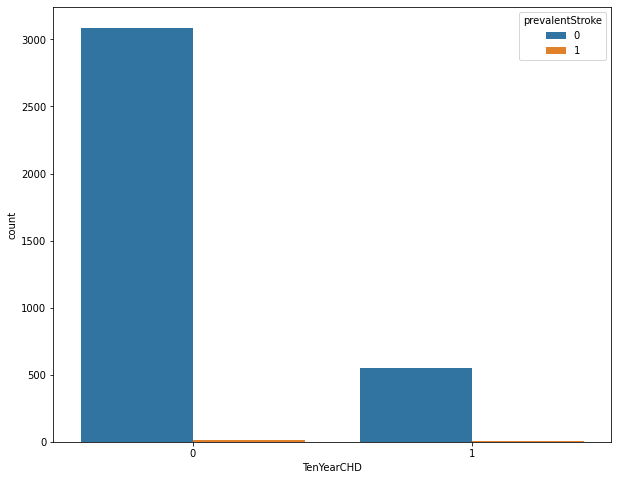

In [36]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.prevalentStroke)
plt.show()

for the people who has CHD and who doesnt, the distribution of prevelantstroke remains the same. Thus this variable is not useful.

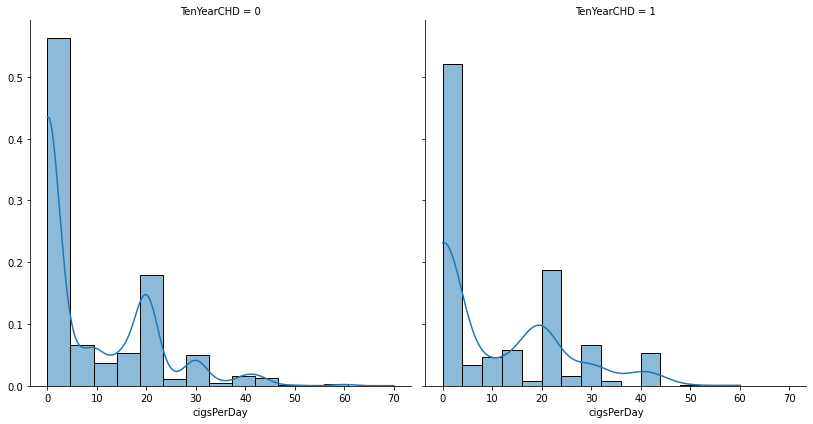

In [101]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "cigsPerDay",bins=15,stat='probability', kde=True)

same dist, no use

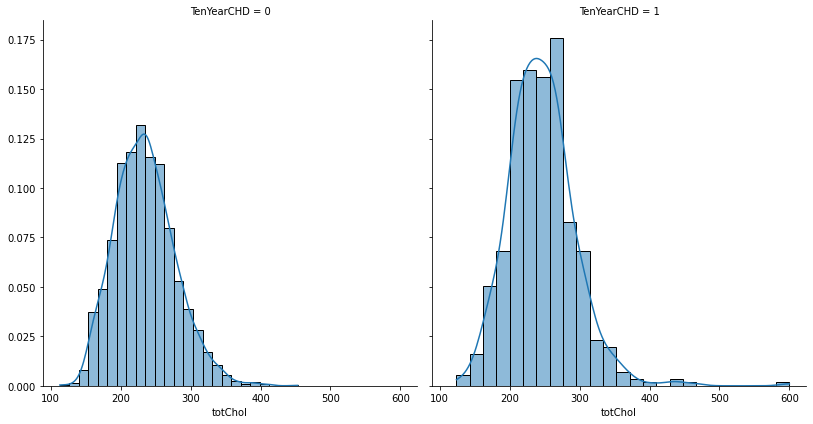

In [100]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "totChol",bins=25,stat='probability', kde=True)

same dist,no use

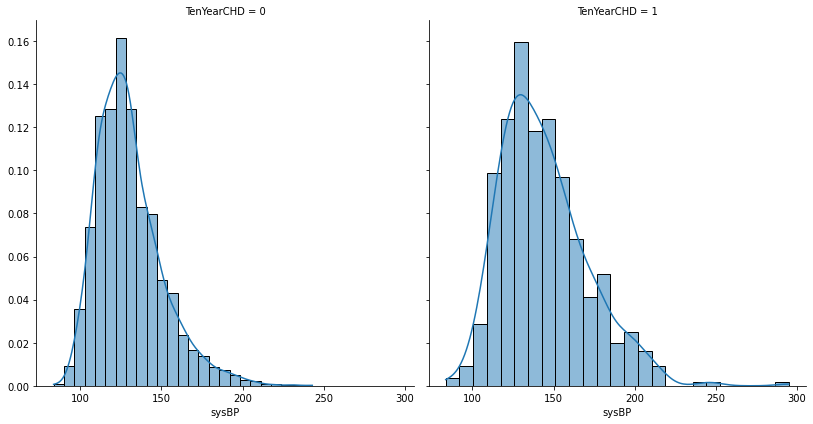

In [99]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "sysBP",bins=25,stat='probability', kde=True)

same dist, no use

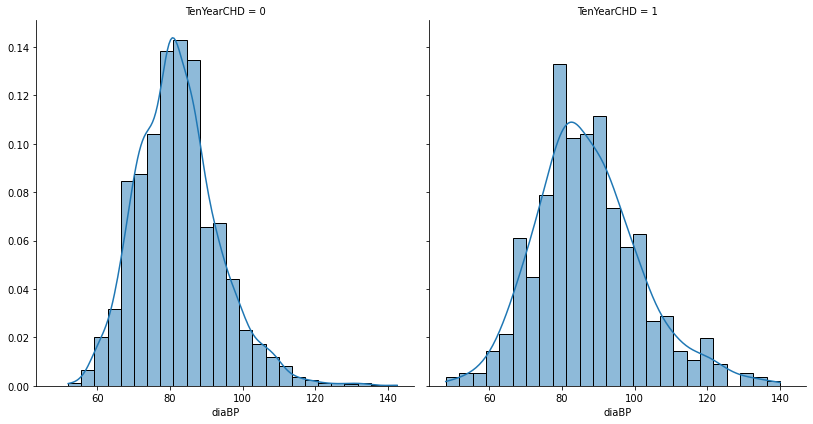

In [98]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "diaBP",bins=25,stat='probability', kde=True)

values after 100 have higher prob in people who has CHD, so variable useful.

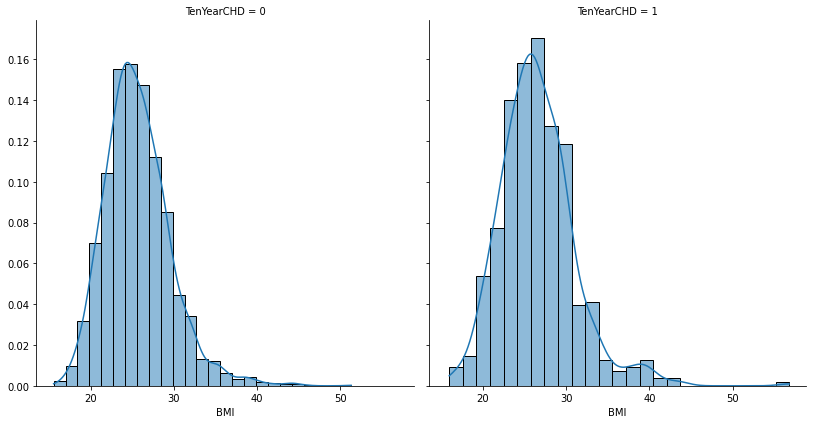

In [102]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "BMI",bins=25,stat='probability', kde=True)

same dist,no use

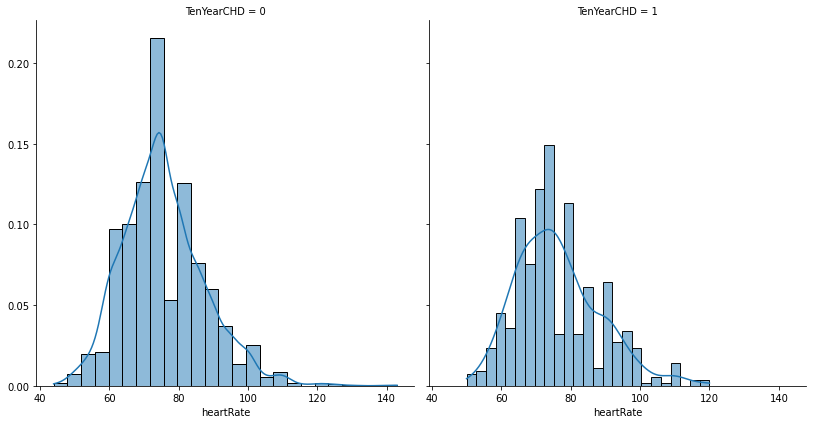

In [103]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "heartRate",bins=25,stat='probability', kde=True)

same dist,no use

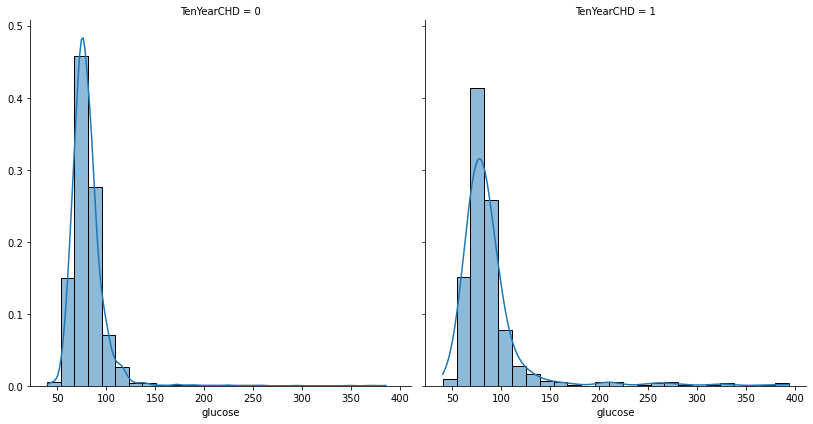

In [104]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "glucose",bins=25,stat='probability', kde=True)

same dist,no use

# Models

In [58]:
y=df.iloc[:,15:16].values.ravel()
x=df.iloc[:,0:15]

# Model 1- Unregularised

In [ ]:
model=LogisticRegression(penalty='none',solver="newton-cg")
model.fit(x,y)
y_pred=model.predict(df.iloc[:,0:15])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
confusion_matrix(y, y_pred)

array([[3082,   19],
       [ 506,   51]])

In [ ]:
df.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

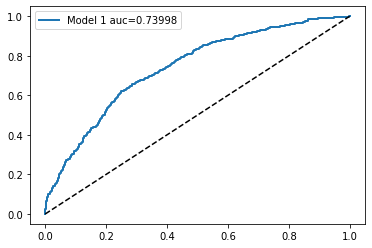

In [ ]:
scores=model.decision_function(df.iloc[:,0:15])
fpr, tpr, thresholds = roc_curve(y, scores)
area=str(np.round(auc(fpr,tpr),5))
plot_roc_curve(fpr,tpr,"Model 1"+" auc="+area)

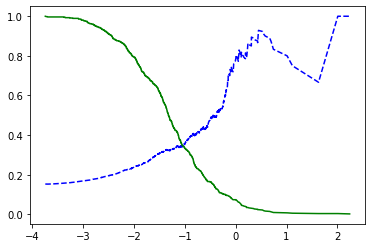

In [ ]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y, scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

In [60]:
print(df.TenYearCHD.value_counts())

0    3101
1     557
Name: TenYearCHD, dtype: int64


# Model 2 -Unregularised,Weighted

In [ ]:
model=LogisticRegression(penalty='none',solver="newton-cg",class_weight="balanced")
model.fit(x,y)
y_pred=model.predict(df.iloc[:,0:15])

In [ ]:
confusion_matrix(y, y_pred)

array([[2104,  997],
       [ 179,  378]])

In [ ]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      3101
           1       0.27      0.68      0.39       557

    accuracy                           0.68      3658
   macro avg       0.60      0.68      0.59      3658
weighted avg       0.82      0.68      0.72      3658



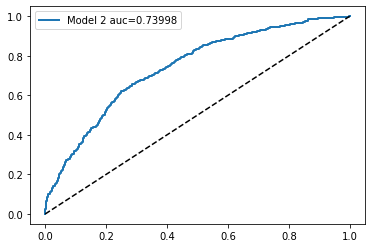

In [ ]:
scores=model.decision_function(df.iloc[:,0:15])
fpr, tpr, thresholds = roc_curve(y, scores)
area=str(np.round(auc(fpr,tpr),5))
plot_roc_curve(fpr,tpr,"Model 2"+" auc="+area)

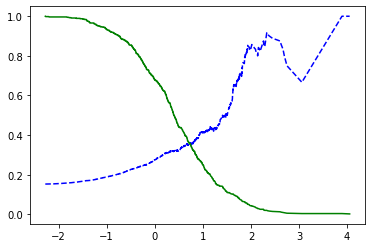

In [ ]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y, scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")